In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.expand_frame_repr', False)  # Evitar cortar en varias líneas
pd.set_option('display.max_colwidth', None)  # Evitar cortar el contenido de las celdas

In [4]:
df = pd.read_csv('Medicaldataset.csv')

In [5]:
print(df.head())

   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  Blood sugar  CK-MB  Troponin    Result
0   64       1          66                      160                        83        160.0   1.80     0.012  negative
1   21       1          94                       98                        46        296.0   6.75     1.060  positive
2   55       1          64                      160                        77        270.0   1.99     0.003  negative
3   64       1          70                      120                        55        270.0  13.87     0.122  positive
4   55       1          64                      112                        65        300.0   1.08     0.003  negative


In [6]:
print(df.describe())

               Age       Gender   Heart rate  Systolic blood pressure  Diastolic blood pressure  Blood sugar        CK-MB     Troponin
count  1319.000000  1319.000000  1319.000000              1319.000000               1319.000000  1319.000000  1319.000000  1319.000000
mean     56.191812     0.659591    78.336619               127.170584                 72.269143   146.634344    15.274306     0.360942
std      13.647315     0.474027    51.630270                26.122720                 14.033924    74.923045    46.327083     1.154568
min      14.000000     0.000000    20.000000                42.000000                 38.000000    35.000000     0.321000     0.001000
25%      47.000000     0.000000    64.000000               110.000000                 62.000000    98.000000     1.655000     0.006000
50%      58.000000     1.000000    74.000000               124.000000                 72.000000   116.000000     2.850000     0.014000
75%      65.000000     1.000000    85.000000           

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB
None


In [8]:
df['Result'] = df['Result'].apply(lambda x: 1 if x == 'positive' else 0 if x == 'negative' else None)

In [9]:
print(df.head())

   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  Blood sugar  CK-MB  Troponin  Result
0   64       1          66                      160                        83        160.0   1.80     0.012       0
1   21       1          94                       98                        46        296.0   6.75     1.060       1
2   55       1          64                      160                        77        270.0   1.99     0.003       0
3   64       1          70                      120                        55        270.0  13.87     0.122       1
4   55       1          64                      112                        65        300.0   1.08     0.003       0


In [10]:
print('Columnas con filas nulas:')
print(df.isnull().sum())

Columnas con filas nulas:
Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


In [11]:
print(df.columns)

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')


In [12]:
columnas_elegidas = ['Age','CK-MB','Troponin']
for col in columnas_elegidas:
    df[col+'_log'] = np.log(df[col] + 1e-10 )
for col in columnas_elegidas:
    df[col+'_log1'] = np.log1p(df[col])

In [13]:
df['Result'] = df.pop('Result')


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Age_log                   1319 non-null   float64
 9   CK-MB_log                 1319 non-null   float64
 10  Troponin_log              1319 non-null   float64
 11  Age_log1                  1319 non-null   float64
 12  CK-MB_log1                1319 non-null   float64
 13  Troponin_log1             1319 non-null   float64
 14  Result  

Text(0.5, 1.0, 'Matriz de Correlación')

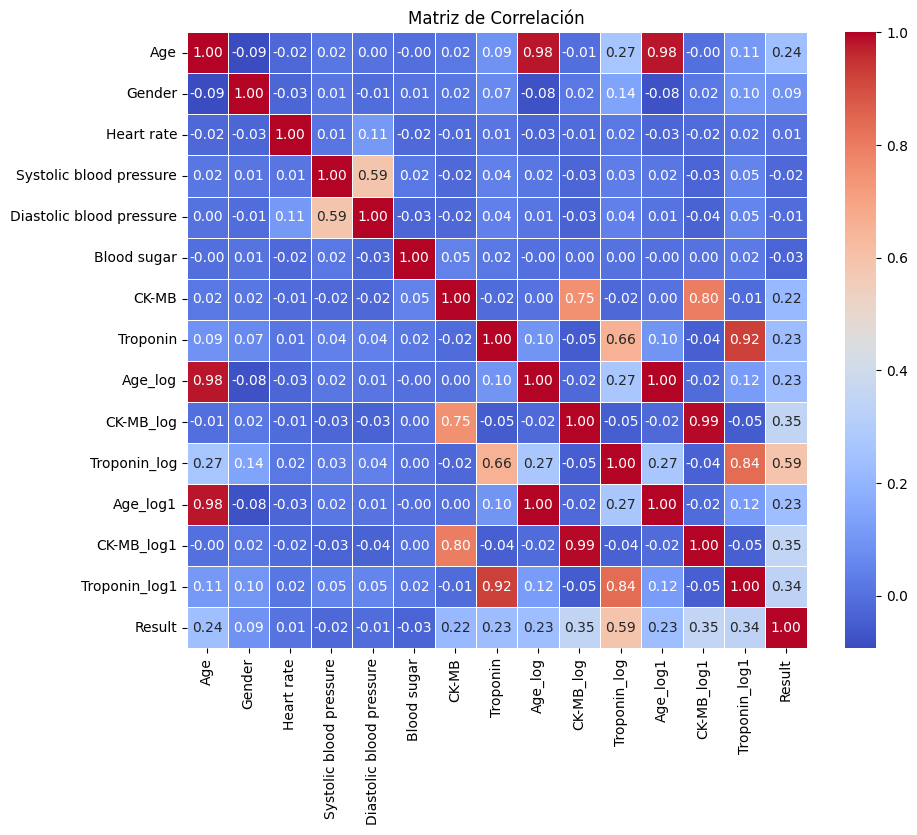

In [15]:
# Crear la matriz de correlación
matriz_correlacion = df.corr()

# matriz_correlacion = df.corr()
# mostrar la matriz de correlación con seaborn
plt.figure(figsize=(10,8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación")

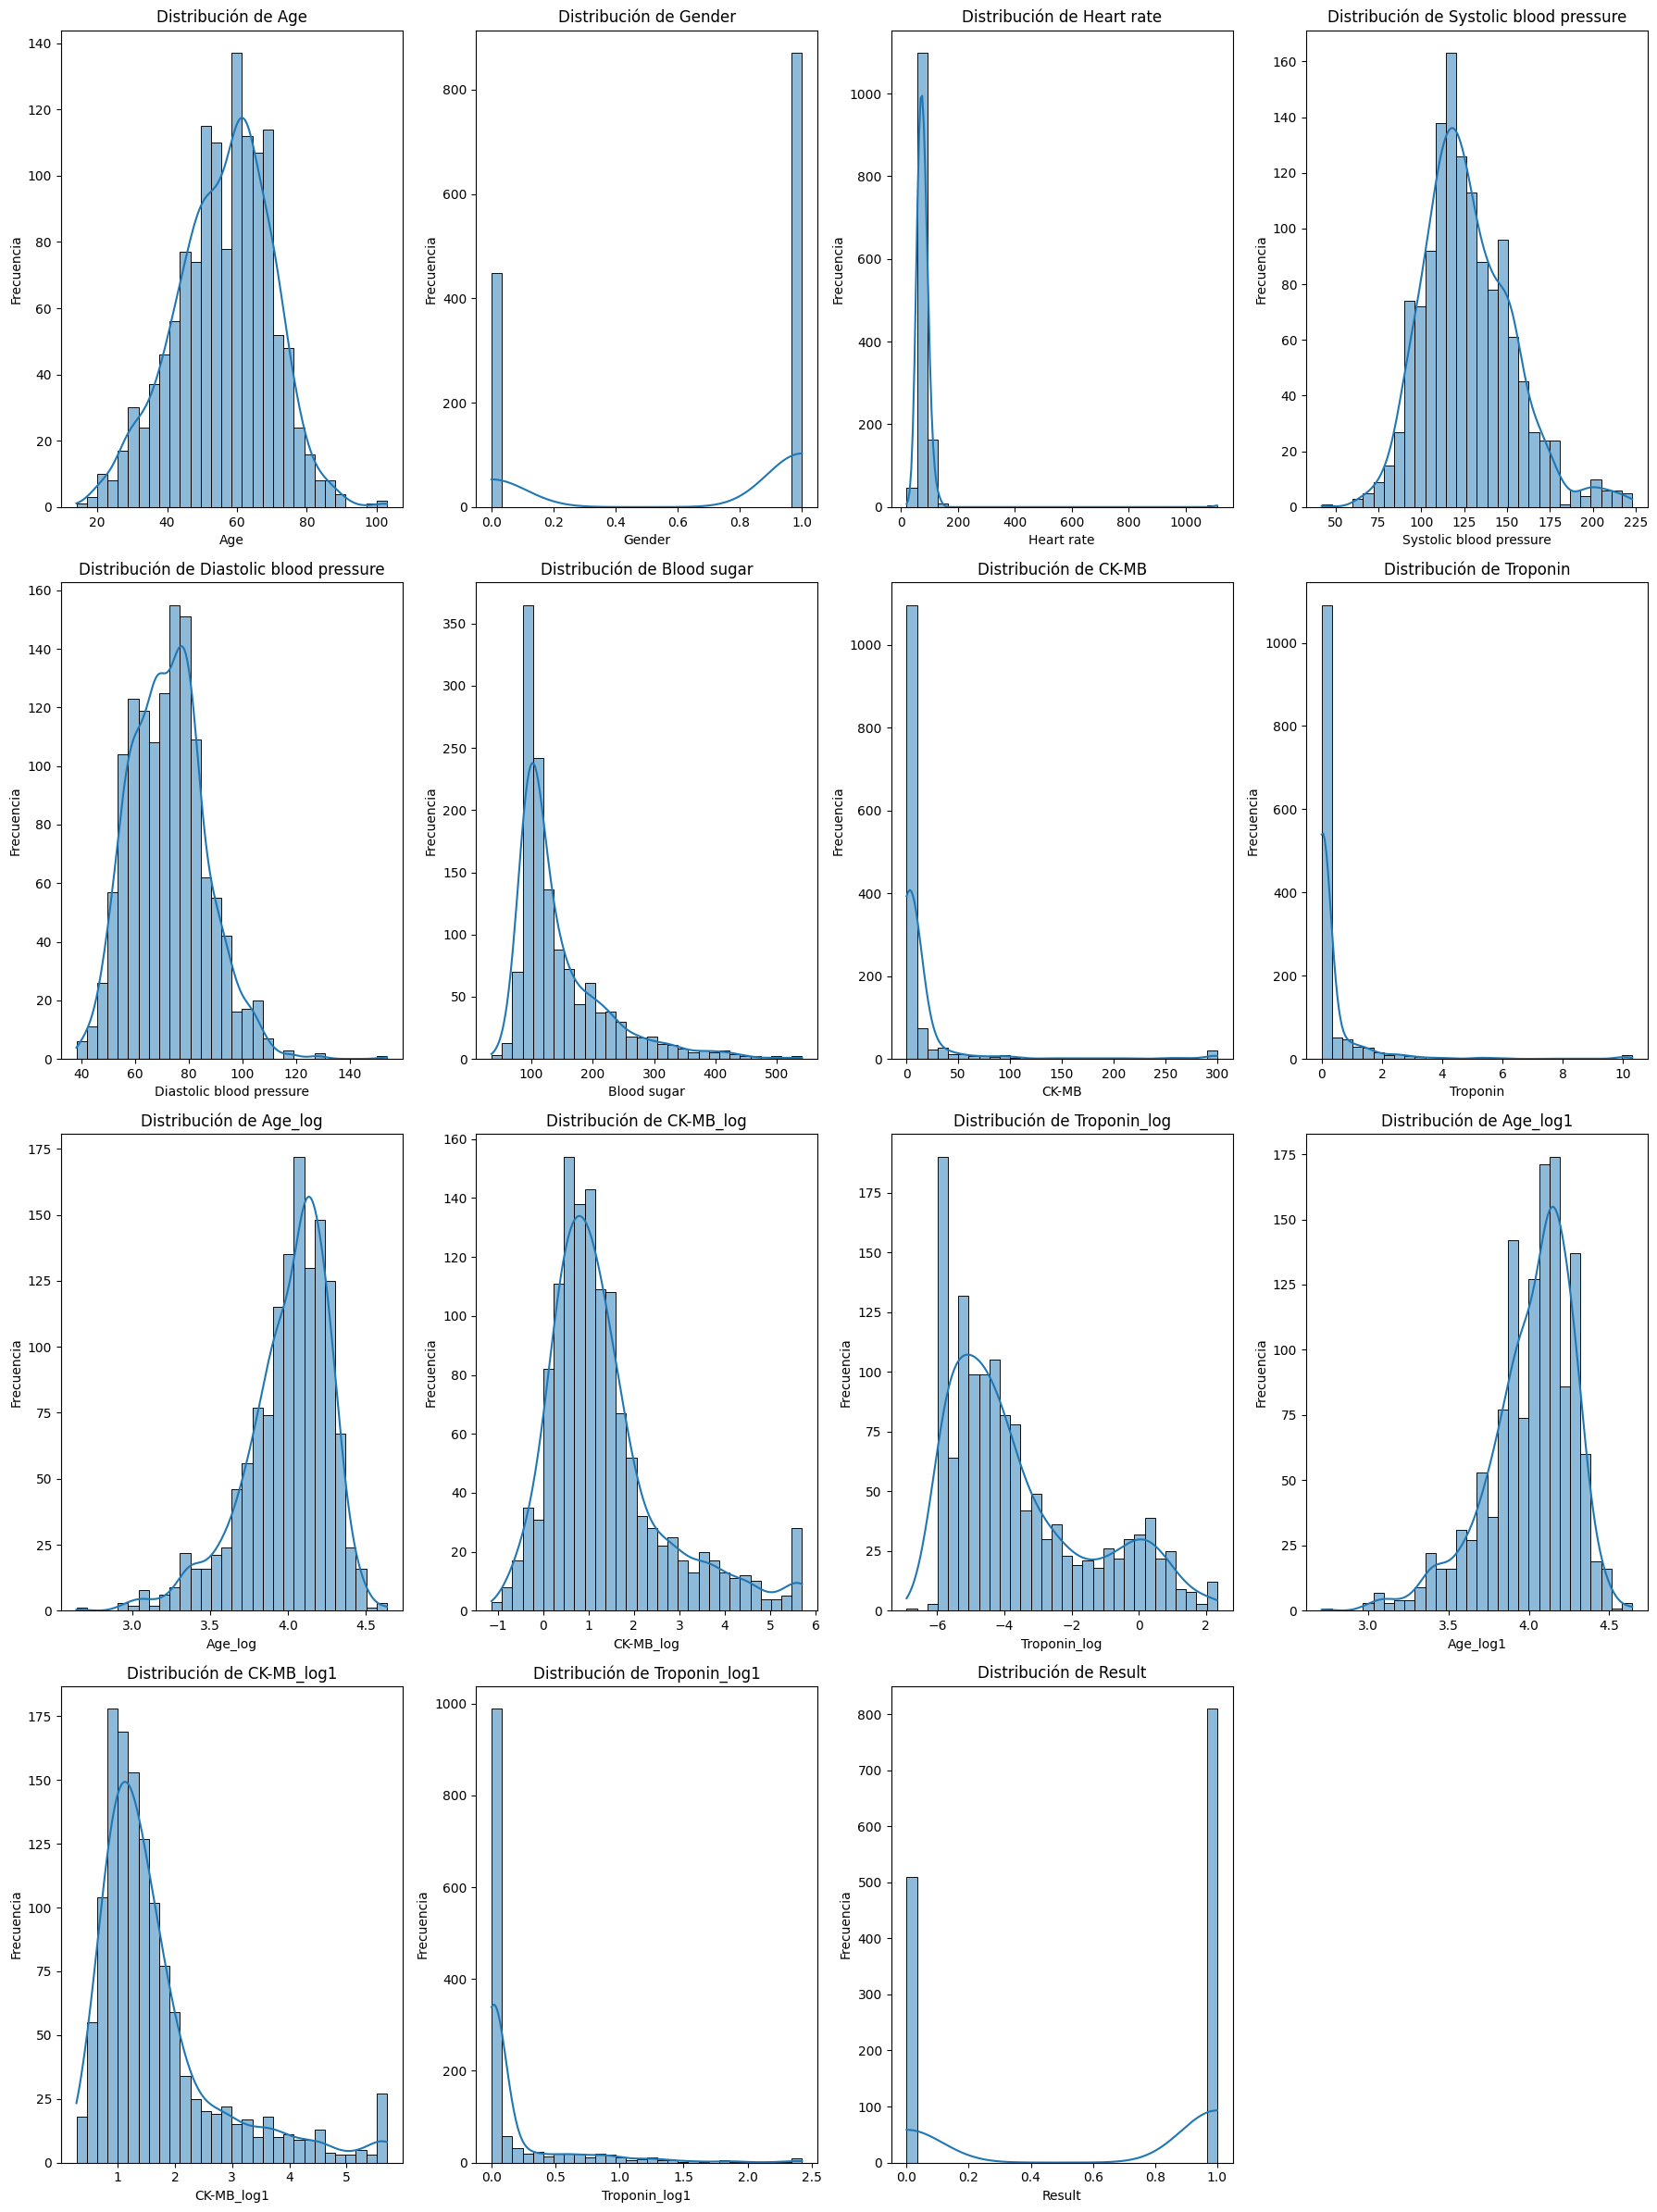

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables a analizar
variables = df.columns

# Crear la figura con subgráficas
ncols = 4  # Número de columnas por fila
nrows = (len(variables) + ncols - 1) // ncols  # Calcular el número de filas necesarias


# Crear la figura con subgráficas
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 6))
# Aplanar los ejes en caso de que haya más de una fila
axes = axes.flatten()

# Graficar la distribución de cada variable en una subgráfica
for i, col in enumerate(variables):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")

# Eliminar los ejes vacíos si es que hay subgráficas adicionales
for i in range(len(variables), len(axes)):
    fig.delaxes(axes[i])

# Ajustar el layout para que no se solapen
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [17]:
# exportar el dataset a csv con las columnas Age, CK-MB_log y Troponin_log y Result
df_final = df[['Age', 'CK-MB_log', 'Troponin_log', 'Result']]
df_final.to_csv('dataset_final.csv', index=False)

**DESPUES SEPARAR DATOS**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Columnas
columnas_numericas = ['Age', 'CK-MB_log', 'Troponin_log']
columna_objetivo = 'Result'

# 2. Separar X (predictoras) e y (objetivo)
X = df[columnas_numericas]
y = df[columna_objetivo]

# 3. Separar en train y test antes de escalar
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 4. Escalar solo las columnas numéricas del train
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[columnas_numericas])
X_test_num_scaled = scaler.transform(X_test[columnas_numericas])

# 5. Convertir a DataFrames con nombres de columnas
X_train_final = pd.DataFrame(X_train_num_scaled, columns=columnas_numericas, index=X_train.index)
X_test_final = pd.DataFrame(X_test_num_scaled, columns=columnas_numericas, index=X_test.index)

# Verificación opcional
print(X_train_final.head())
print(y_train.head())


           Age  CK-MB_log  Troponin_log
881  -0.159143   0.938751     -0.815166
723  -1.467989   0.096629     -1.053250
889   0.640708  -0.677957      1.316036
1004  1.149703  -0.968734     -0.273049
761  -0.086429  -0.804186      0.552234
881     1
723     0
889     1
1004    1
761     1
Name: Result, dtype: int64


Regresión Logística:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       102
           1       0.95      0.94      0.94       162

    accuracy                           0.93       264
   macro avg       0.93      0.93      0.93       264
weighted avg       0.93      0.93      0.93       264

Accuracy: 0.9318181818181818


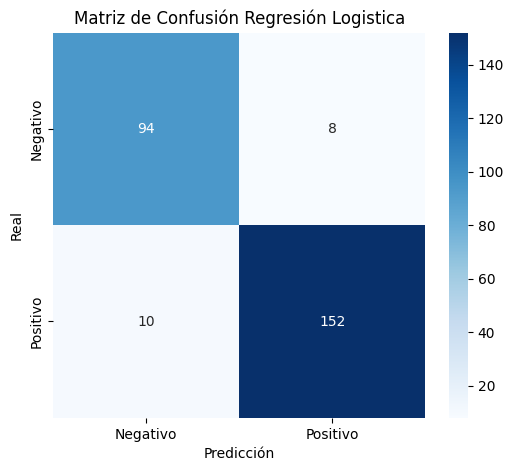

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Crear el modelo
modelo_log = LogisticRegression(max_iter=1000, random_state=42)

# 2. Entrenar
modelo_log.fit(X_train_final, y_train)

# 3. Predecir en el test
y_pred_log = modelo_log.predict(X_test_final)

# 4. Evaluar el modelo
print("Regresión Logística:")
print(classification_report(y_test, y_pred_log)) # Evaluación 
print("Accuracy:", accuracy_score(y_test, y_pred_log))

cm_log = confusion_matrix(y_test, y_pred_log) 
plt.figure(figsize=(6, 5))
sns.heatmap(cm_log, annot=True, fmt='g', cmap='Blues', xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.title("Matriz de Confusión Regresión Logistica")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

Naive Bayes:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       102
           1       0.97      0.93      0.95       162

    accuracy                           0.94       264
   macro avg       0.93      0.94      0.93       264
weighted avg       0.94      0.94      0.94       264

Accuracy: 0.9356060606060606


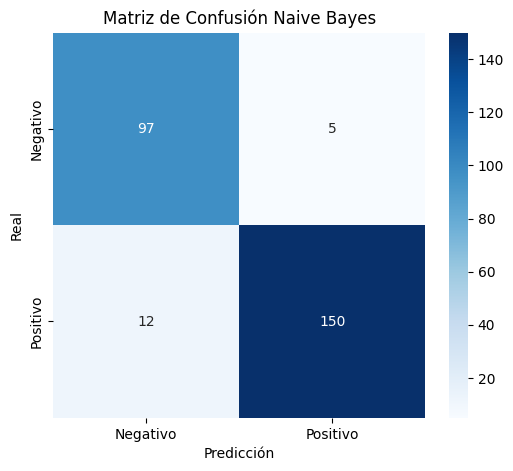

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Crear el modelo
modelo_nb = GaussianNB()

# 2. Entrenar
modelo_nb.fit(X_train_final, y_train)

# 3. Predecir en el test
y_pred_nb = modelo_nb.predict(X_test_final)

# 4. Evaluar el modelo
print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb)) # Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt='g', cmap='Blues', xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.title("Matriz de Confusión Naive Bayes")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


KNN:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       102
           1       0.97      0.94      0.96       162

    accuracy                           0.95       264
   macro avg       0.94      0.95      0.94       264
weighted avg       0.95      0.95      0.95       264

Accuracy: 0.946969696969697


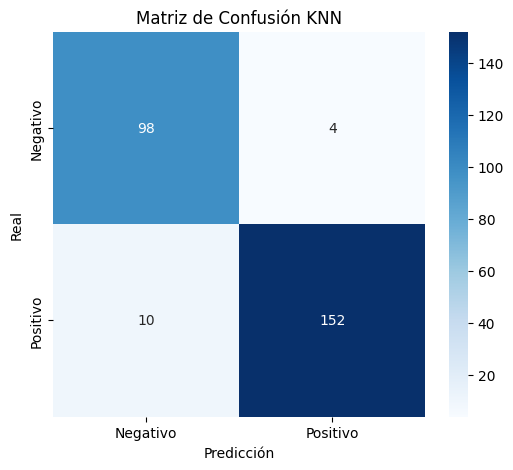

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Crear el modelo (k=5 por defecto, pero se puede ajustar)
modelo_knn = KNeighborsClassifier(n_neighbors=5)

# 2. Entrenar
modelo_knn.fit(X_train_final, y_train)

# 3. Predecir
y_pred_knn = modelo_knn.predict(X_test_final)

# 4. Evaluar
print("KNN:")
print(classification_report(y_test, y_pred_knn)) # Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='g', cmap='Blues', xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.title("Matriz de Confusión KNN")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


# validacion cruzada

In [26]:
from sklearn.model_selection import cross_val_score

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Evaluación con cross-validation (k=10)
log_scores = cross_val_score(modelo_log, X_train, y_train, cv=10, scoring="accuracy")
nb_scores = cross_val_score(modelo_nb, X_train, y_train, cv=10, scoring="accuracy")
knn_scores = cross_val_score(modelo_knn, X_train, y_train, cv=10, scoring="accuracy")

print("Accuracy Regresión Logística (Cross-Val):", log_scores.mean())
print("Accuracy Naive Bayes (Cross-Val):        ", nb_scores.mean())
print("Accuracy KNN (Cross-Val):                ", knn_scores.mean())

Accuracy Regresión Logística (Cross-Val): 0.9090296495956874
Accuracy Naive Bayes (Cross-Val):         0.9337017070979335
Accuracy KNN (Cross-Val):                 0.918472596585804


In [28]:
results = pd.DataFrame({
    "Modelo": ["Regresión Logística", "Naive Bayes", "KNN"],
    "Accuracy": [accuracy_score(y_test, y_pred_log), 
                 accuracy_score(y_test, y_pred_nb), 
                 accuracy_score(y_test, y_pred_knn)],
    "Cross-Val Accuracy": [log_scores.mean(), nb_scores.mean(), knn_scores.mean()]
})
print('Resultados de Validación Cruzada')
print(results)

Resultados de Validación Cruzada
                Modelo  Accuracy  Cross-Val Accuracy
0  Regresión Logística  0.931818            0.909030
1          Naive Bayes  0.935606            0.933702
2                  KNN  0.946970            0.918473


In [30]:
# imprtar recall precision f1 y auc
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score

def calcular_metricas(y_test, y_pred, modelo_nombre):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = accuracy_score(y_test, y_pred)
    error_rate = 1 - accuracy
    sensitivity = recall_score(y_test, y_pred)  # También llamada Recall
    specificity = tn / (tn + fp)  
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred) if len(set(y_test)) == 2 else "No aplicable para clasificación binaria"

    df_resultados = pd.DataFrame({  # Crear un DataFrame con los resultados
        "Modelo": [modelo_nombre],
        "Accuracy": [accuracy],
        "Error Rate": [error_rate],
        "Sensitivity (Recall)": [sensitivity],
        "Specificity": [specificity],
        "Precision": [precision],
        "F1-Measure": [f1],
        "AUC-ROC": [auc_roc] })
    return df_resultados

df_log = calcular_metricas(y_test, y_pred_log, "Regresión Logística")
df_nb = calcular_metricas(y_test, y_pred_nb, "Naive Bayes")
df_knn = calcular_metricas(y_test, y_pred_knn, "KNN")

df_resultados_final = pd.concat([df_log, df_nb, df_knn], ignore_index=True)
print(df_resultados_final)

                Modelo  Accuracy  Error Rate  Sensitivity (Recall)  Specificity  Precision  F1-Measure   AUC-ROC
0  Regresión Logística  0.931818    0.068182              0.938272     0.921569   0.950000    0.944099  0.929920
1          Naive Bayes  0.935606    0.064394              0.925926     0.950980   0.967742    0.946372  0.938453
2                  KNN  0.946970    0.053030              0.938272     0.960784   0.974359    0.955975  0.949528


<Figure size 1000x600 with 0 Axes>

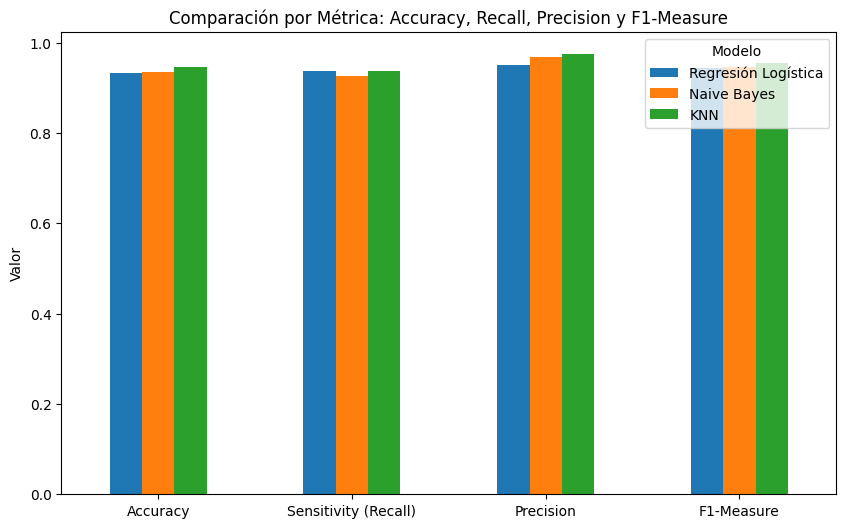

<Figure size 1000x600 with 0 Axes>

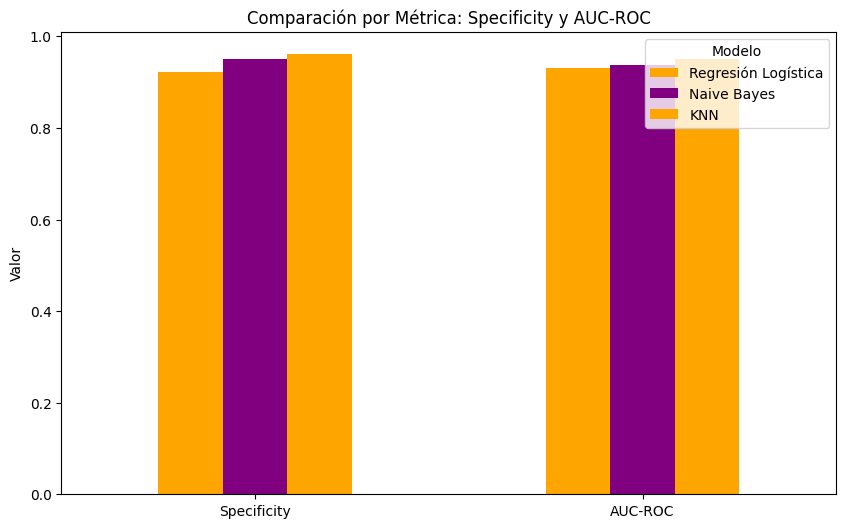

C:\Users\eliut\AppData\Local\Temp\ipykernel_28600\512570462.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_resultados_final, y="Error Rate", x="Modelo", palette="Reds_r")


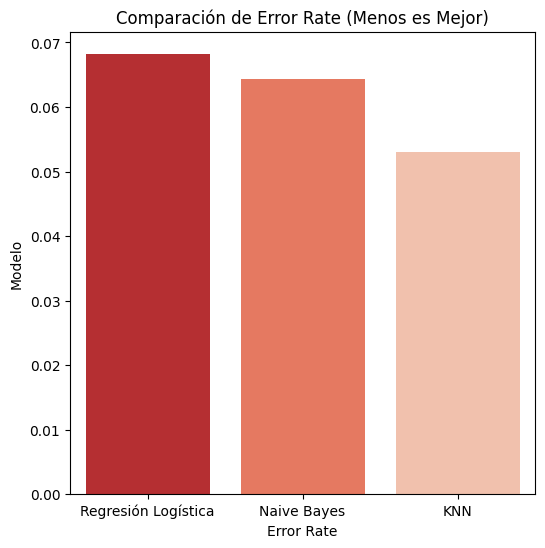

In [31]:
# Gráfico de Barras - Métricas en el eje X
plt.figure(figsize=(10,6))
df_resultados_final.set_index("Modelo")[["Accuracy", "Sensitivity (Recall)", "Precision", "F1-Measure"]].T.plot(kind="bar", figsize=(10,6))
plt.title("Comparación por Métrica: Accuracy, Recall, Precision y F1-Measure")
plt.ylabel("Valor")
plt.xticks(rotation=0)
plt.legend(title="Modelo", loc='upper right')
plt.show()

# Comparación de Specificity y AUC-ROC
plt.figure(figsize=(10,6))
df_resultados_final.set_index("Modelo")[["Specificity", "AUC-ROC"]].T.plot(kind="bar", figsize=(10,6), color=["orange", "purple"])
plt.title("Comparación por Métrica: Specificity y AUC-ROC")
plt.ylabel("Valor")
plt.xticks(rotation=0)
plt.legend(title="Modelo", loc='upper right')
plt.show()

# Comparación de Error Rate agrupado por métrica (aunque solo hay una, se mantiene formato)
plt.figure(figsize=(6,6))
sns.barplot(data=df_resultados_final, y="Error Rate", x="Modelo", palette="Reds_r")
plt.title("Comparación de Error Rate (Menos es Mejor)")
plt.xlabel("Error Rate")
plt.ylabel("Modelo")
plt.show()


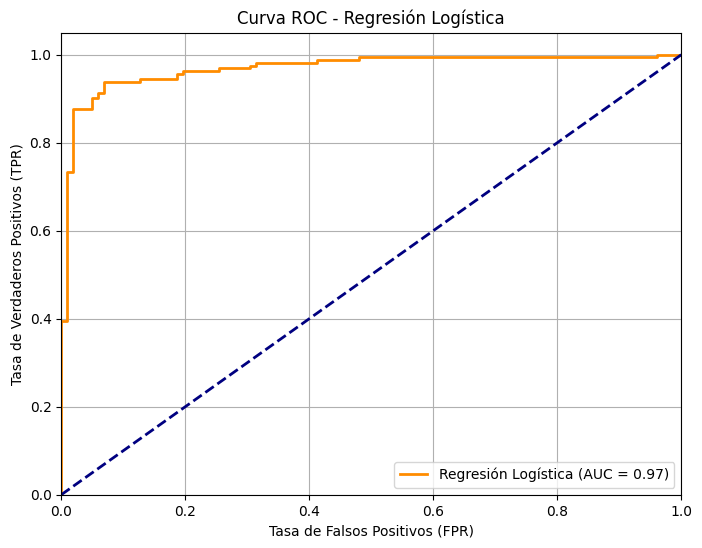

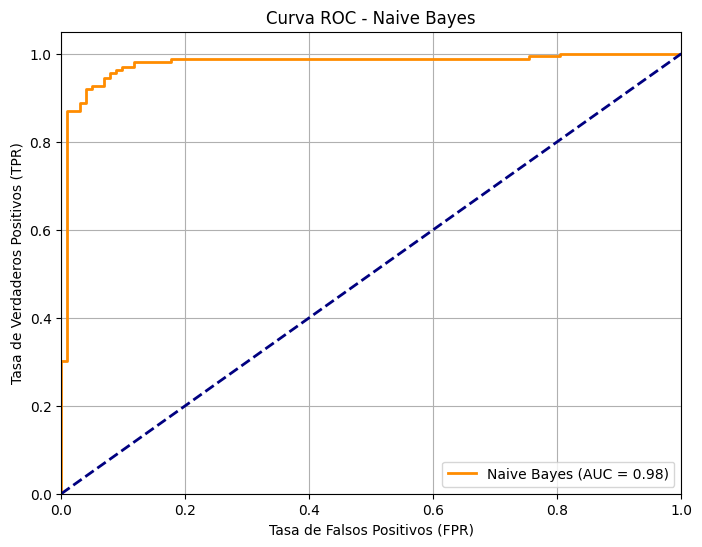

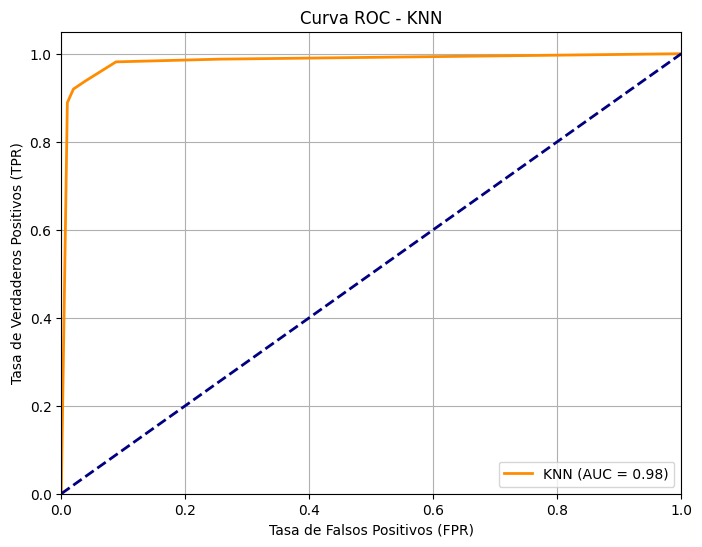

AUC-ROC Regresión Logística: 0.97
AUC-ROC Naive Bayes:        0.98
AUC-ROC KNN:                0.98


In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Función para graficar una curva ROC individual
def plot_roc_curve(fpr, tpr, model_name, auc):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Función para calcular y graficar la curva ROC de un modelo
def calculate_roc_auc(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plot_roc_curve(fpr, tpr, model_name, auc)
    return auc

# Calcular y graficar curva ROC para cada modelo (una por figura)
auc_log = calculate_roc_auc(modelo_log, X_test_final, y_test, "Regresión Logística")
auc_nb = calculate_roc_auc(modelo_nb, X_test_final, y_test, "Naive Bayes")
auc_knn = calculate_roc_auc(modelo_knn, X_test_final, y_test, "KNN")

# Mostrar los valores AUC-ROC en consola
print(f"AUC-ROC Regresión Logística: {auc_log:.2f}")
print(f"AUC-ROC Naive Bayes:        {auc_nb:.2f}")
print(f"AUC-ROC KNN:                {auc_knn:.2f}")


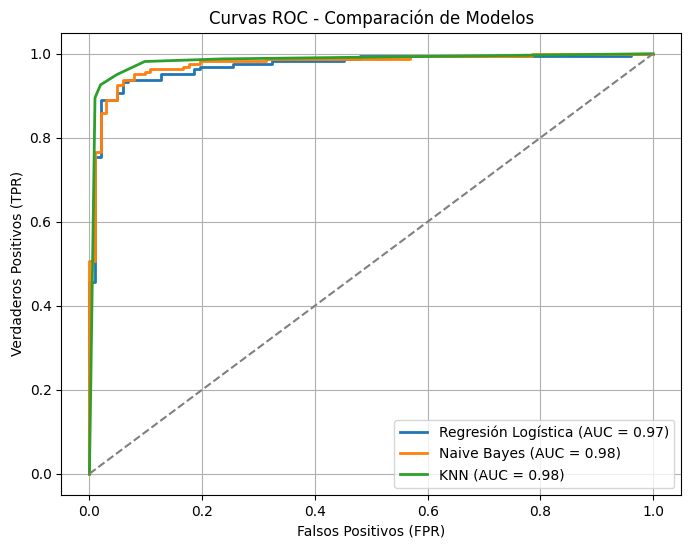

In [ ]:
# Gráfico comparativo de las 3 curvas ROC
def plot_all_roc_curves():
    plt.figure(figsize=(8, 6))
    
    for model, name in zip([modelo_log, modelo_nb, modelo_knn],
                           ["Regresión Logística", "Naive Bayes", "KNN"]):
        y_prob = model.predict_proba(X_test_final)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {auc:.2f})")
    
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("Falsos Positivos (FPR)")
    plt.ylabel("Verdaderos Positivos (TPR)")
    plt.title("Curvas ROC - Comparación de Modelos")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Llamar a la función
plot_all_roc_curves()


Resumen general del proyecto
- selección de variables
- ingeniería de atributos
- preprocesamiento
- división de datos
- escalado

Modelos implementados:
- Regresión Logistica
- Naive Bayes
- KNN

Métricas utilizadas: 
- accuracy
- recall
- precision
- F1
- AUC

Correcciones
- evitar el data leakage (filtrar información durante el entrenamiento, puede sesgar el modelo)
- escalar después del train_test_split.

Técnicas de evaluación utilizadas:
- matriz de confusión
- métricas de rendimiento
- curvas ROC
- validación cruzada

Predicción de Evento Cardíaco

Objetivo del proyecto
Predecir si un paciente sufrirá un evento cardíaco (probablemente un infarto), basándose en variables clínicas. Se trata de un problema de clasificación binaria (0 = negativo, 1 = positivo).

📌 Fases del Proyecto
1. Carga y análisis exploratorio de datos
Se cargó un dataset clínico con información como edad, frecuencia cardíaca, presión arterial, enzimas cardíacas, etc.

Se revisó la estructura (info()), distribución de valores (describe()), y valores nulos.

2. Transformación de la variable objetivo
Result fue transformada de texto ('positive', 'negative') a valores binarios (1 y 0).

3. Ingeniería de atributos
Se crearon nuevas variables que combinan información existente para mejorar el poder predictivo del modelo:

Nueva variable	Qué representa
MAP	Presión arterial media
Cardio_index	Frecuencia cardíaca x presión sistólica
Marker_total	CK-MB + Troponina (daño cardíaco total)
Marker_log	Logaritmo de los marcadores, para reducir sesgo
Age_Troponin_log1	Interacción entre edad y troponina
Troponin_risk	Riesgo categórico (Normal, Elevado, Crítico)
También se aplicaron transformaciones logarítmicas para estabilizar escalas y reducir la influencia de valores extremos.

4. Codificación de variables categóricas
Se aplicó pd.get_dummies() a Troponin_risk para obtener variables dummy.

Se evitó la multicolinealidad usando drop_first=True.

multicolinealidad es cuando dos o más variables independientes están altamente correlacionadas entre sí.

5. Selección de variables finales
Se eligieron 7 variables predictoras más la variable objetivo:

['Age', 'CK-MB_log', 'Troponin_log', 'Marker_log', 
 'Age_Troponin_log1', 'Troponin_risk_Elevado', 'Troponin_risk_Crítico', 'Result']

1. Separación de datos y escalado
Se dividió el dataset en entrenamiento y prueba (train_test_split).

Solo se escalaron las variables numéricas (no las dummies ni la variable objetivo) con StandardScaler.

**Modelos aplicados**
- Regresión Logística
  Modelo lineal que estima la probabilidad de que ocurra el evento, fácil de interpretar y útil como línea base.

- Naive Bayes (GaussianNB)
  Modelo probabilístico basado en la suposición de independencia entre variables, rápido y sorprendentemente efectivo en muchos casos.

- KNN (K-Nearest Neighbors)
  Clasifica según los k vecinos más cercanos, sensible al escalado de datos.

**Métricas para evaluar modelos:**

Accuracy	        Porcentaje total de predicciones correctas
Recall(Sensitivity)	Cuántos positivos fueron correctamente detectados
Precision	        De los que predijimos como positivos, cuántos realmente lo son
F1-Score	        Media armónica entre precision y recall
Specificity	        Qué tan bien predice los negativos
Error Rate	        1 - Accuracy (errores totales)
AUC-ROC	            Área bajo la curva ROC, mide discriminación general del modelo


- Interpretación de curvas ROC
  Cada modelo genera una curva que muestra cómo varía la sensibilidad vs. la tasa de falsos positivos.
  Cuanto más cerca del vértice superior izquierdo, mejor el modelo.

- El área bajo la curva (AUC) resume esta información:
  AUC de 1.0 es perfecto.
  AUC de 0.5 es aleatorio.

Los tres modelos tienen AUC ≥ 0.97, lo cual es excelente.

**Conclusiones**
- Se aplicó un pipeline completo de machine learning:
- Limpieza, transformación, selección de variables, modelado, evaluación.
- Se evitaron errores comunes como escalar antes del split.
- Los tres modelos ofrecen buen rendimiento, con KNN ligeramente mejor, aunque Naive Bayes sorprende por su simplicidad.
- El análisis de métricas y curvas ROC permitió comparar con profundidad y no quedarse solo con "accuracy".

- Exponer
Por qué elegiste esas variables: clínicas, relevantes, algunas transformadas para estabilidad.
Por qué hiciste ingeniería de atributos: para ayudar a los modelos a ver patrones no evidentes.
Por qué escalaste solo después del split: para evitar data leakage.
Qué significa cada métrica (accuracy no siempre es suficiente).
Qué te dice la curva ROC y el AUC.
Qué fortalezas y debilidades tuvo cada modelo.

**Tecnicas para encontrar los hiperparametros**

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import uniform
import numpy as np


# 4. Definir el modelo base
modelo_base = LogisticRegression(max_iter=1000)

# 5. Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],  # Solvers compatibles con l1, l2 y elasticnet
    'C': uniform(0.01, 10),
    'l1_ratio': [0.1, 0.5, 0.9]  # Solo se usa si penalty='elasticnet'
}

# 6. Configurar búsqueda aleatoria
random_search = RandomizedSearchCV(
    modelo_base,
    param_distributions=param_dist,
    n_iter=50,             # Número de combinaciones aleatorias a probar
    cv=10,                  # Validación cruzada
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# 7. Ejecutar búsqueda
random_search.fit(X_train_final, y_train)

# 8. Evaluar el mejor modelo
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_final)
accuracy = accuracy_score(y_test, y_pred)

# 9. Mostrar resultados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

print("\nExactitud en el conjunto de prueba:")
print(f"{accuracy:.4f}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Mejores hiperparámetros encontrados:
{'C': 9.07828441545754, 'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Exactitud en el conjunto de prueba:
0.9432


c:\Users\eliut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\eliut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\eliut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\eliut\AppDa

In [ ]:
import joblib

# Guardar el mejor modelo encontrado por RandomizedSearchCV
joblib.dump(best_model, 'mejor_modelo_logistico.pkl')

# Cargar el mejor modelo guardado
loaded_model = joblib.load('mejor_modelo_logistico.pkl')

# Evaluar el modelo cargado
y_pred_loaded = loaded_model.predict(X_test_final)
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)

# Mostrar resultados
print("Exactitud en el conjunto de prueba del modelo cargado:")
print(f"{accuracy_loaded:.4f}")

# 🔍 Acceder a los coeficientes e intercepto
print("Intercepto (intercept_):", loaded_model.intercept_)
print("Coeficientes (coef_):", loaded_model.coef_)

Exactitud en el conjunto de prueba del modelo cargado:
0.9432
Intercepto (intercept_): [15.78076307]
Coeficientes (coef_): [[-0.17649568 -2.32019896  7.09456254 53.30014654]]


import pandas as pd
import numpy as np

# Coeficientes (aplanados)
coefs = np.array([-1.21059662e+00, -2.37807191e-01, -1.02942274e-01, 0.00000000e+00,
   1.31201033e-03, -1.58051342e-01, 5.46538689e+01, -1.59327156e+01,
   1.05773254e+00, -3.40253602e+00, 9.11065268e+00, 0.00000000e+00,
   0.00000000e+00, 4.51517435e+00, 9.79478413e-02, 0.00000000e+00,
   3.83881061e+01, -2.21763732e+00, 1.19176785e+01, -7.34661663e-01,
  -6.42510184e-01, 9.79067581e-02, 0.00000000e+00])

# Columnas (sin 'Result')
columnas = ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
   'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
   'Age_log', 'CK-MB_log', 'Troponin_log', 'Age_log1', 'CK-MB_log1',
   'Troponin_log1', 'MAP', 'Cardio_index', 'Marker_total', 'Marker_log',
   'Age_Troponin_log1', 'Age_group_Adulto', 'Age_group_Mayor',
   'Troponin_risk_Elevado', 'Troponin_risk_Crítico']

# Crear un DataFrame para ver el impacto
impacto = pd.DataFrame({
    'Variable': columnas,
    'Coeficiente': coefs,
    'Valor absoluto': np.abs(coefs)
})

# Ordenar por mayor impacto
impacto_ordenado = impacto.sort_values(by='Valor absoluto', ascending=False)

print(impacto_ordenado)

 Variable  Coeficiente  Valor absoluto
6                      CK-MB    54.653869       54.653869
16              Marker_total    38.388106       38.388106
7                   Troponin   -15.932716       15.932716
18         Age_Troponin_log1    11.917678       11.917678
10              Troponin_log     9.110653        9.110653
13             Troponin_log1     4.515174        4.515174
9                  CK-MB_log    -3.402536        3.402536
17                Marker_log    -2.217637        2.217637
0                        Age    -1.210597        1.210597
8                    Age_log     1.057733        1.057733
19          Age_group_Adulto    -0.734662        0.734662
20           Age_group_Mayor    -0.642510        0.642510
1                     Gender    -0.237807        0.237807
5                Blood sugar    -0.158051        0.158051
2                 Heart rate    -0.102942        0.102942
14                       MAP     0.097948        0.097948
21     Troponin_risk_Elevado     0.097907        0.097907
4   Diastolic blood pressure     0.001312        0.001312
11                  Age_log1     0.000000        0.000000
15              Cardio_index     0.000000        0.000000
12                CK-MB_log1     0.000000        0.000000
3    Systolic blood pressure     0.000000        0.000000
22     Troponin_risk_Crítico     0.000000        0.000000

In [ ]:
grupos = {
    'Age': ['Age', 'Age_log', 'Age_log1'],
    'CK-MB': ['CK-MB', 'CK-MB_log', 'CK-MB_log1'],
    'Troponin': ['Troponin', 'Troponin_log', 'Troponin_log1'],
    'Marker': ['Marker_total', 'Marker_log'],
    'Age_Troponin': ['Age_Troponin_log1'],
    'Extras': ['Gender', 'Heart rate', 'Systolic blood pressure',
               'Diastolic blood pressure', 'Blood sugar', 'MAP',
               'Cardio_index', 'Age_group_Adulto', 'Age_group_Mayor',
               'Troponin_risk_Elevado', 'Troponin_risk_Crítico']
}


In [ ]:
import itertools
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score

# Suponé que ya tenés tu DataFrame df y la variable target y
X = df.drop(columns=['Result'])
y = df['Result']

# Grupos definidos manualmente
grupos = {
    'Age': ['Age', 'Age_log', 'Age_log1'],
    'CK-MB': ['CK-MB', 'CK-MB_log', 'CK-MB_log1'],
    'Troponin': ['Troponin', 'Troponin_log', 'Troponin_log1'],
    'Marker': ['Marker_total', 'Marker_log'],
    'Age_Troponin': ['Age_Troponin_log1'],
    'Extras': ['Gender', 'Heart rate', 'Systolic blood pressure',
               'Diastolic blood pressure', 'Blood sugar', 'MAP',
               'Cardio_index', 'Age_group_Adulto', 'Age_group_Mayor',
               'Troponin_risk_Elevado', 'Troponin_risk_Crítico']
}

# Generar todas las combinaciones posibles, eligiendo una sola de cada grupo
combinaciones = list(itertools.product(
    grupos['Age'],
    grupos['CK-MB'],
    grupos['Troponin'],
    grupos['Marker']
))

resultados = []

for combo in combinaciones:
    variables = list(combo) + grupos['Age_Troponin'] + grupos['Extras']
    X_sel = X[variables]

    modelo = LogisticRegression(solver='liblinear', max_iter=1000)
    auc = cross_val_score(modelo, X_sel, y, cv=5, scoring='accuracy').mean()

    resultados.append({
        'Variables': combo,
        'AUC': auc
    })

# Convertimos a DataFrame para ver los resultados
df_resultados = pd.DataFrame(resultados)
df_ordenado = df_resultados.sort_values(by='AUC', ascending=False).reset_index(drop=True)

print(df_ordenado)


                                              Variables       AUC
0          (Age, CK-MB_log, Troponin_log, Marker_total)  0.933290
1      (Age_log, CK-MB_log, Troponin_log, Marker_total)  0.933287
2           (Age_log1, CK-MB, Troponin_log, Marker_log)  0.931772
3                (Age, CK-MB, Troponin_log, Marker_log)  0.931012
4              (Age, CK-MB, Troponin_log, Marker_total)  0.931009
5     (Age_log, CK-MB_log1, Troponin_log, Marker_total)  0.930257
6    (Age_log1, CK-MB_log1, Troponin_log, Marker_total)  0.930257
7     (Age_log1, CK-MB_log, Troponin_log, Marker_total)  0.930251
8            (Age_log, CK-MB, Troponin_log, Marker_log)  0.930251
9          (Age_log, CK-MB, Troponin_log, Marker_total)  0.929494
10        (Age_log1, CK-MB, Troponin_log, Marker_total)  0.927978
11        (Age, CK-MB_log1, Troponin_log, Marker_total)  0.925706
12     (Age_log1, CK-MB_log1, Troponin_log, Marker_log)  0.917370
13      (Age_log, CK-MB_log1, Troponin_log, Marker_log)  0.915851
14      (A